## Data Analysis

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880059 entries, 0 to 880058
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   timestamp             880059 non-null  object 
 1   lamppost_district_en  880059 non-null  object 
 2   lamppost_location_en  880059 non-null  object 
 3   no                    869061 non-null  float64
 4   no2                   869106 non-null  float64
 5   pm25                  869039 non-null  float64
dtypes: float64(3), object(3)
memory usage: 40.3+ MB
None

Summary Statistics:

Missing Values:
timestamp                   0
lamppost_district_en        0
lamppost_location_en        0
no                      10998
no2                     10953
pm25                    11020
dtype: int64

Duplicate Rows: 0


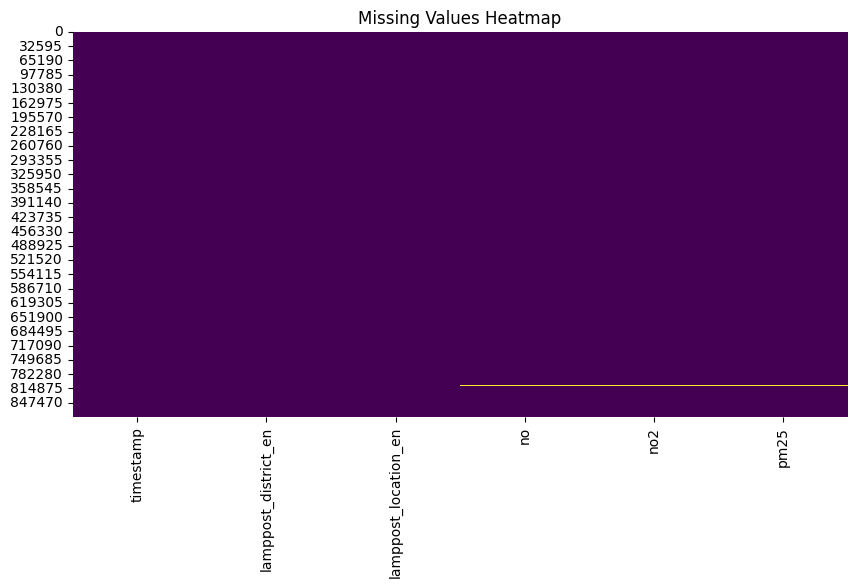

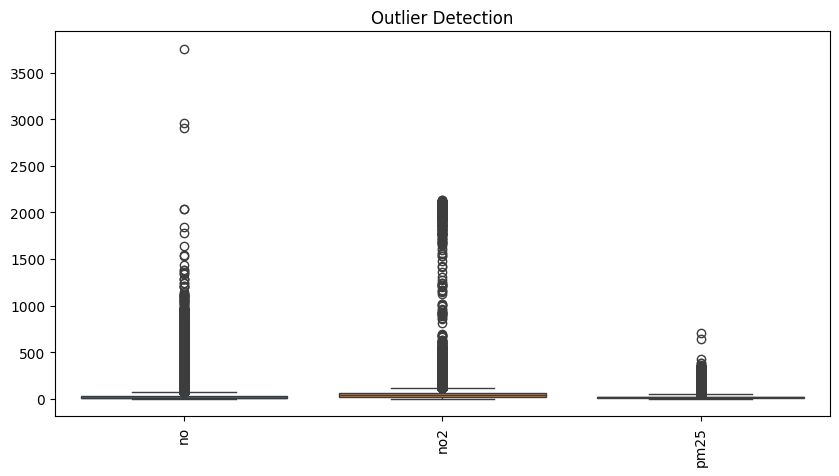

Index(['timestamp', 'lamppost_district_en', 'lamppost_location_en'], dtype='object')
Column: timestamp
['2024-03-19T01:25:00.000Z' '2024-03-19T01:30:00.000Z'
 '2024-03-19T01:35:00.000Z' ... '2025-02-28T15:45:00.000Z'
 '2025-02-28T15:50:00.000Z' '2025-02-28T15:55:00.000Z']
------------------------------
Column: lamppost_district_en
['Central and Western' 'Kowloon City' 'Yau Tsim Mong' 'Sai Kung'
 'Wan Chai' 'Kwun Tong']
------------------------------
Column: lamppost_location_en
['Connaught Road Central' 'Shing Kai Road near Tak Long Estate'
 'Avenue of Stars near Shangri-La' 'Hong Kong Space Museum'
 'Canton Road near Ocean Centre' 'Canton Road near The Gateway Tower'
 'ARQ - On Kin Road' 'ARQ - On Yu Road' 'Harbour Road'
 'Harcourt Road near Tim Mei Avenue' 'ARQ - On Hei Street']
------------------------------


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


df = pd.read_csv("../data/air_quality.csv") 

# Step 2: Check basic info
print("Basic Info:")
print(df.info())

# Step 3: Summary statistics
print("\nSummary Statistics:")
# print(df.describe(include="all"))  # Show stats for numerical & categorical

# Step 4: Check missing values
print("\nMissing Values:")
print(df.isnull().sum())
# df_null = df[df.isnull().any(axis=1)]
# print(df_null)

# Step 5: Check duplicate rows
print("\nDuplicate Rows:", df.duplicated().sum())

# Step 6: Visualize missing values
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

# Step 7: Check outliers using boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df.select_dtypes(include=["number"]))  # Only numeric columns
plt.xticks(rotation=90)
plt.title("Outlier Detection")
plt.show()

# Step 8: Check Category
cat_cols = df.select_dtypes(include=["object"]).columns
print(cat_cols)
for col in cat_cols:
    print(f"Column: {col}")
    print(df[col].unique())  # Show unique categories
    print("-" * 30)

    

## Data Cleansing

In [9]:
# Step 1: Remove Duplicates
df.drop_duplicates(inplace=True)

# Step 2: Drop Null
df = df.dropna(subset=["pm25"])
print(df.isnull().sum())

# Step 3: Filter Outlier
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1
# df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

timestamp                  0
lamppost_district_en       0
lamppost_location_en       0
no                      2107
no2                     2062
pm25                       0
dtype: int64
